In [1]:
import osmnx as nx;

In [2]:
import networkx as kx;

In [3]:
import geopandas as gpd;

In [4]:
import matplotlib.pyplot as plt;

In [5]:
import descartes as desc;

In [6]:
#definições pós-importações:

lugar = 'João Pessoa, PB, BR';
network_type = 'drive';
travel_speed = 40; #km/h

In [8]:
G = nx.graph_from_place(lugar, network_type=network_type);

In [144]:
#obtendo as coordenadas da camada de pontos:

escolas = gpd.read_file("C:\\Users/firmi/OneDrive/Documentos/escolas.geojson");

In [145]:
escolas

,CODI_CART,NIVEL,ESCOLA,geometry
0,523290184,EM,AFONSO PEREIRA DA SILVA,POINT (-34.81802 -7.17743)
1,170030293,CREI,ODUVALDO BATISTA,POINT (-34.86974 -7.10056)
2,170030293,EM,VIOLETA FORMIGA,POINT (-34.86986 -7.10015)
3,581360376,EM,JORNALISTA RAIMUNDO NONATO BATISTA,POINT (-34.88437 -7.19891)
4,510100250,CREI,MARINETE PAIVA FERNANDES DE OLIVEIRA,POINT (-34.84088 -7.20492)
...,...,...,...,...
126,380230116,EM,CELSO MONTEIRO FURTADO,POINT (-34.88127 -7.17357)
127,283120388,EM,EDUARDO FRANCISCO PEREIRA DA NOBREGA,POINT (-34.88156 -7.16576)
128,371720144,CREI,MARIA DE NAZARE,POINT (-34.88316 -7.18404)
129,120240372,EM,JOÃO VINAGRE,POINT (-34.83813 -7.12331)


In [305]:
#Escolhendo origem e destino:

origem = escolas.loc[escolas['ESCOLA'] == 'ODUVALDO BATISTA'];

destino = escolas.loc[escolas['ESCOLA'] =='JOÃO VINAGRE'];


In [278]:
#Capturando os nós:

nodes = nx.graph_to_gdfs(GRAPH, edges=False);
nodes[['x', 'y']];

AttributeError: module 'networkx' has no attribute 'graph_to_gdfs'

In [322]:

id1 = ox.distance.nearest_nodes(G, -34.86974, 
                                -7.10056, return_dist=False);



id2 = ox.distance.nearest_nodes(G, -34.83813, 
                             -7.12331, return_dist=False);



458409484

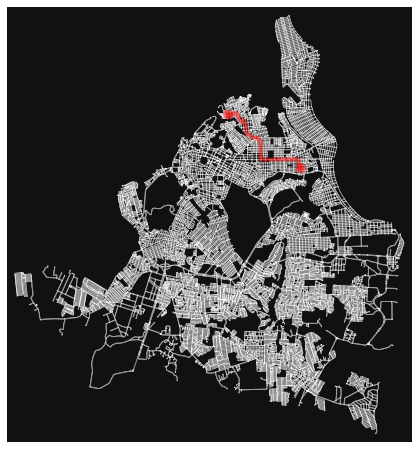

In [348]:
#Com os IDs dos Nós, calcular a rota mais curta:

trajeto = ox.distance.shortest_path(G, id1, id2, weight='length', cpus=1);

rc1 = ['r'] * (len(trajeto) - 1);
rc2 = ['b'] * len(trajeto);
rc = rc1 + rc2;
nc = ['r', 'r', 'b', 'b'];

#plotar:

fig, ax = ox.plot_graph_route(G, trajeto, node_size=1);


In [323]:
import networkx as nx
import osmnx as ox
ox.config(log_console=True, use_cache=True)


# pick 4 random nodes as origins/destinations for the 2 routes
orig1 = list(G.nodes())[id1]
dest1 = list(G.nodes())[id2]


# calculate shortest paths for the 2 routes
route1 = nx.shortest_path(G, orig1, dest1, weight='length')
route2 = nx.shortest_path(G, orig2, dest2, weight='length')

# create route colors
rc1 = ['r'] * (len(route1) - 1)
rc2 = ['b'] * len(route2)
rc = rc1 + rc2
nc = ['r', 'r', 'b', 'b']

# plot the routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], route_color=rc, orig_dest_node_color=nc, node_size=0)

IndexError: list index out of range

In [361]:
#Exportar em shapefile:

G.to_file("C:\\Users/firmi/OneDrive/Documentos/JoaoPessoaVias.shp");
trajeto.to_file("C:\\Users/firmi/OneDrive/Documentos/trajeto.shp");

AttributeError: 'MultiDiGraph' object has no attribute 'to_file'

In [28]:
origem = nx.distance.nearest_nodes(GRAPH, X1, Y1, return_dist=False);
destino = nx.distance.nearest_nodes(GRAPH, X2, Y2, return_dist=False);

trajeto = nx.distance.shortest_path(GRAPH, origem, destino, weight='lenght');

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [404]:
trajeto.to_file("package.gpkg", layer='countries', driver="GPKG")

AttributeError: 'list' object has no attribute 'to_file'

In [407]:
import csv;

with open('C:\\Users/firmi/OneDrive/Documentos/G.csv', 'w', newline = '') as csvfile:
    G = csv.writer(csvfile, delimiter = ',')
    G.writerow(trajeto);